# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [2]:
import logging

import matplotlib.pyplot as plt
import numpy as np

import core.config as cconfig
import core.plotting.boxplot as cploboxp
import core.plotting.correlation as cplocorr
import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import dataflow.model.model_plotter as dtfmomoplo
import dataflow.model.test.test_model_evaluator as cdmttme
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton
One and only one set-up config should be true:
is_cmamp_prod=False
is_dev4=False
is_dev_ck=False
is_ig_prod=False
is_inside_ci=False
is_mac=False
Don't recognize host: host_os_name=Linux, am_host_os_name=Linux


In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-8902123e-d184-4d91-8f71-b0414c79d112.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.6.0' != container_version='1.7.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask459_Unit_test_plot_slippage_boxplot()'
  hash='65f1db578'
  # Last commits:
    * 65f1db578 why2000  SorrTask459_Unit_test_plot_slippage_boxplot()                     (  26 hours ago) Tue Sep 19 21:58:03 2023  (HEAD -> SorrTask459_Unit_test_plot_slippage_boxplot(), origin/SorrTask459_Unit_test_plot_slippage_boxplot())
    * a913421e1 why2000  SorrTask459_Unit_test_plot_slippage_boxplot()                     (  28 hou

# Build config

In [4]:
config = cconfig.get_config_from_env()
if config:
    _LOG.info("Using config from env vars")
else:
    _LOG.info("Using hardwired config")
    config_dict = {"figsize": (20, 10)}
    config = cconfig.Config.from_dict(config_dict)
print(config)

INFO  Using hardwired config
figsize: (20, 10)


# Test data

In [14]:
test_df = cptetepl.Test_plots.get_test_plot_df1()

# Plots

## `plot_histograms_and_lagged_scatterplot()`

In [15]:
test_srs = cptetepl.Test_plots.get_plot_histograms_and_lagged_scatterplot1()
lag = 7

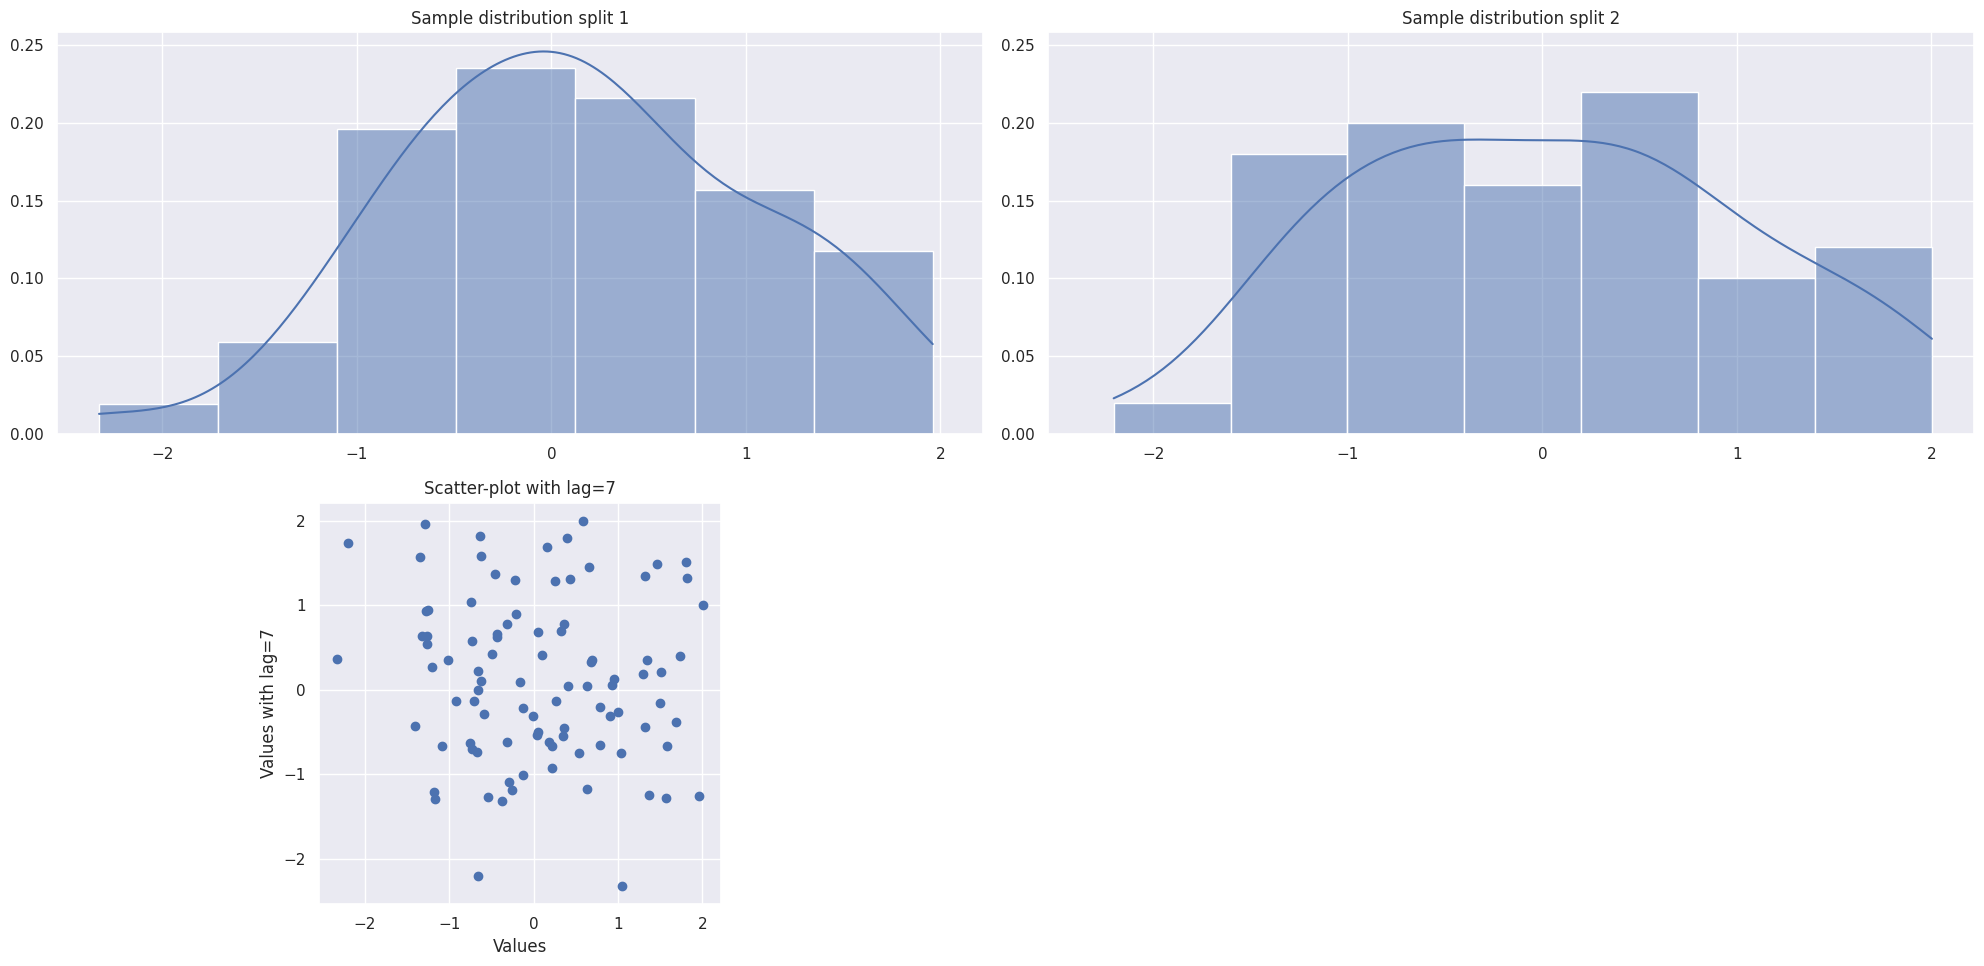

In [6]:
cpvistte.plot_histograms_and_lagged_scatterplot(
    test_srs, lag, figsize=config["figsize"]
)

## `plot_timeseries_distribution()`

In [7]:
test_srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()

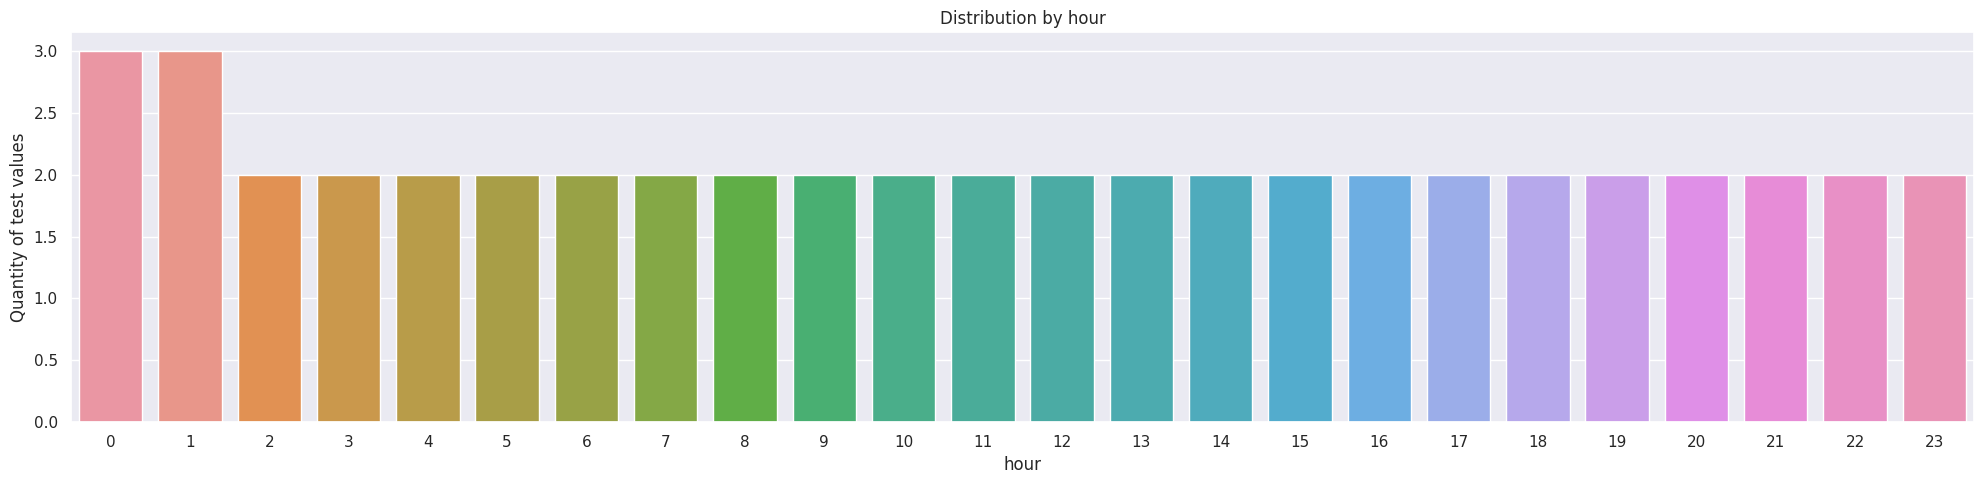

In [8]:
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

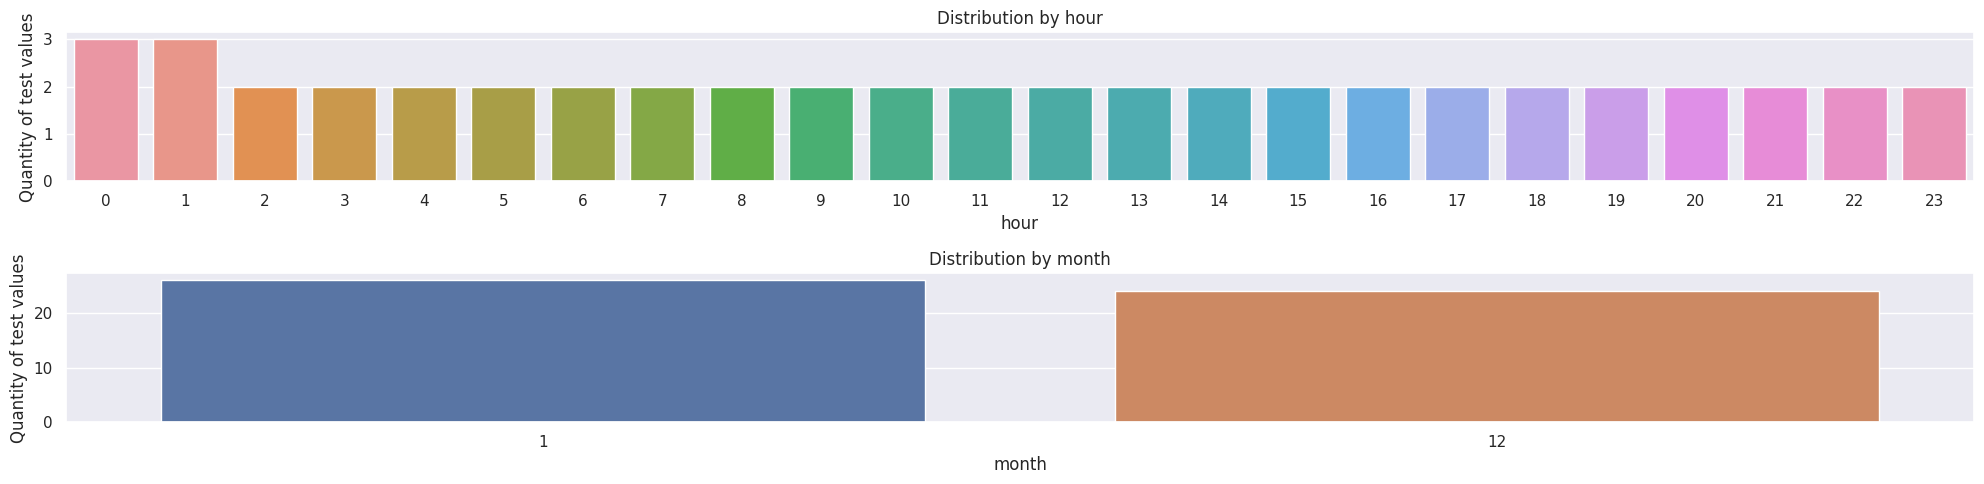

In [9]:
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(test_srs, datetime_types)

## `plot_time_series_by_period()`

In [10]:
test_srs = cptetepl.Test_plots.get_plot_time_series_by_period1()

/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


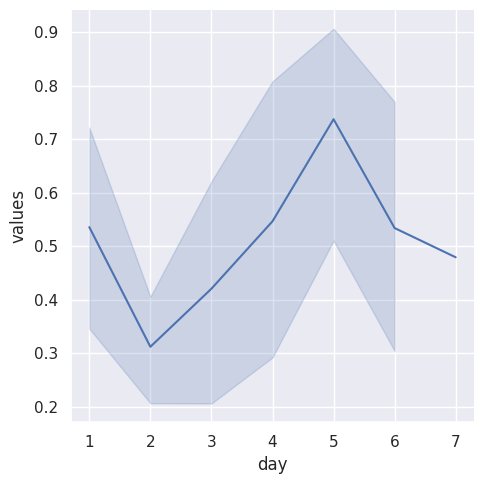

In [11]:
period = "day"
cplmiplo.plot_time_series_by_period(test_srs, period)

/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


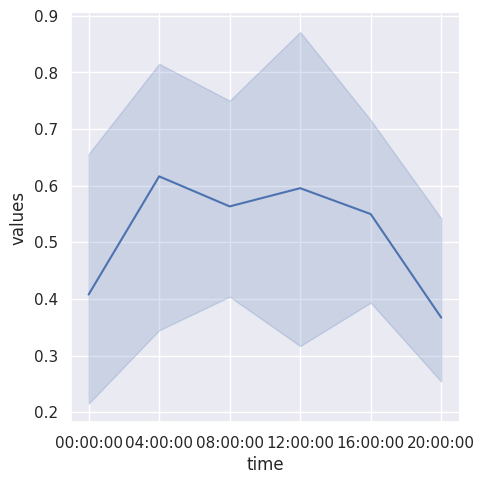

In [12]:
period = "time"
cplmiplo.plot_time_series_by_period(test_srs, period)

## `plot_heatmap()`

In [16]:
mode = "clustermap"

WARNING The corr_df.shape[0]='100' > 20


/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


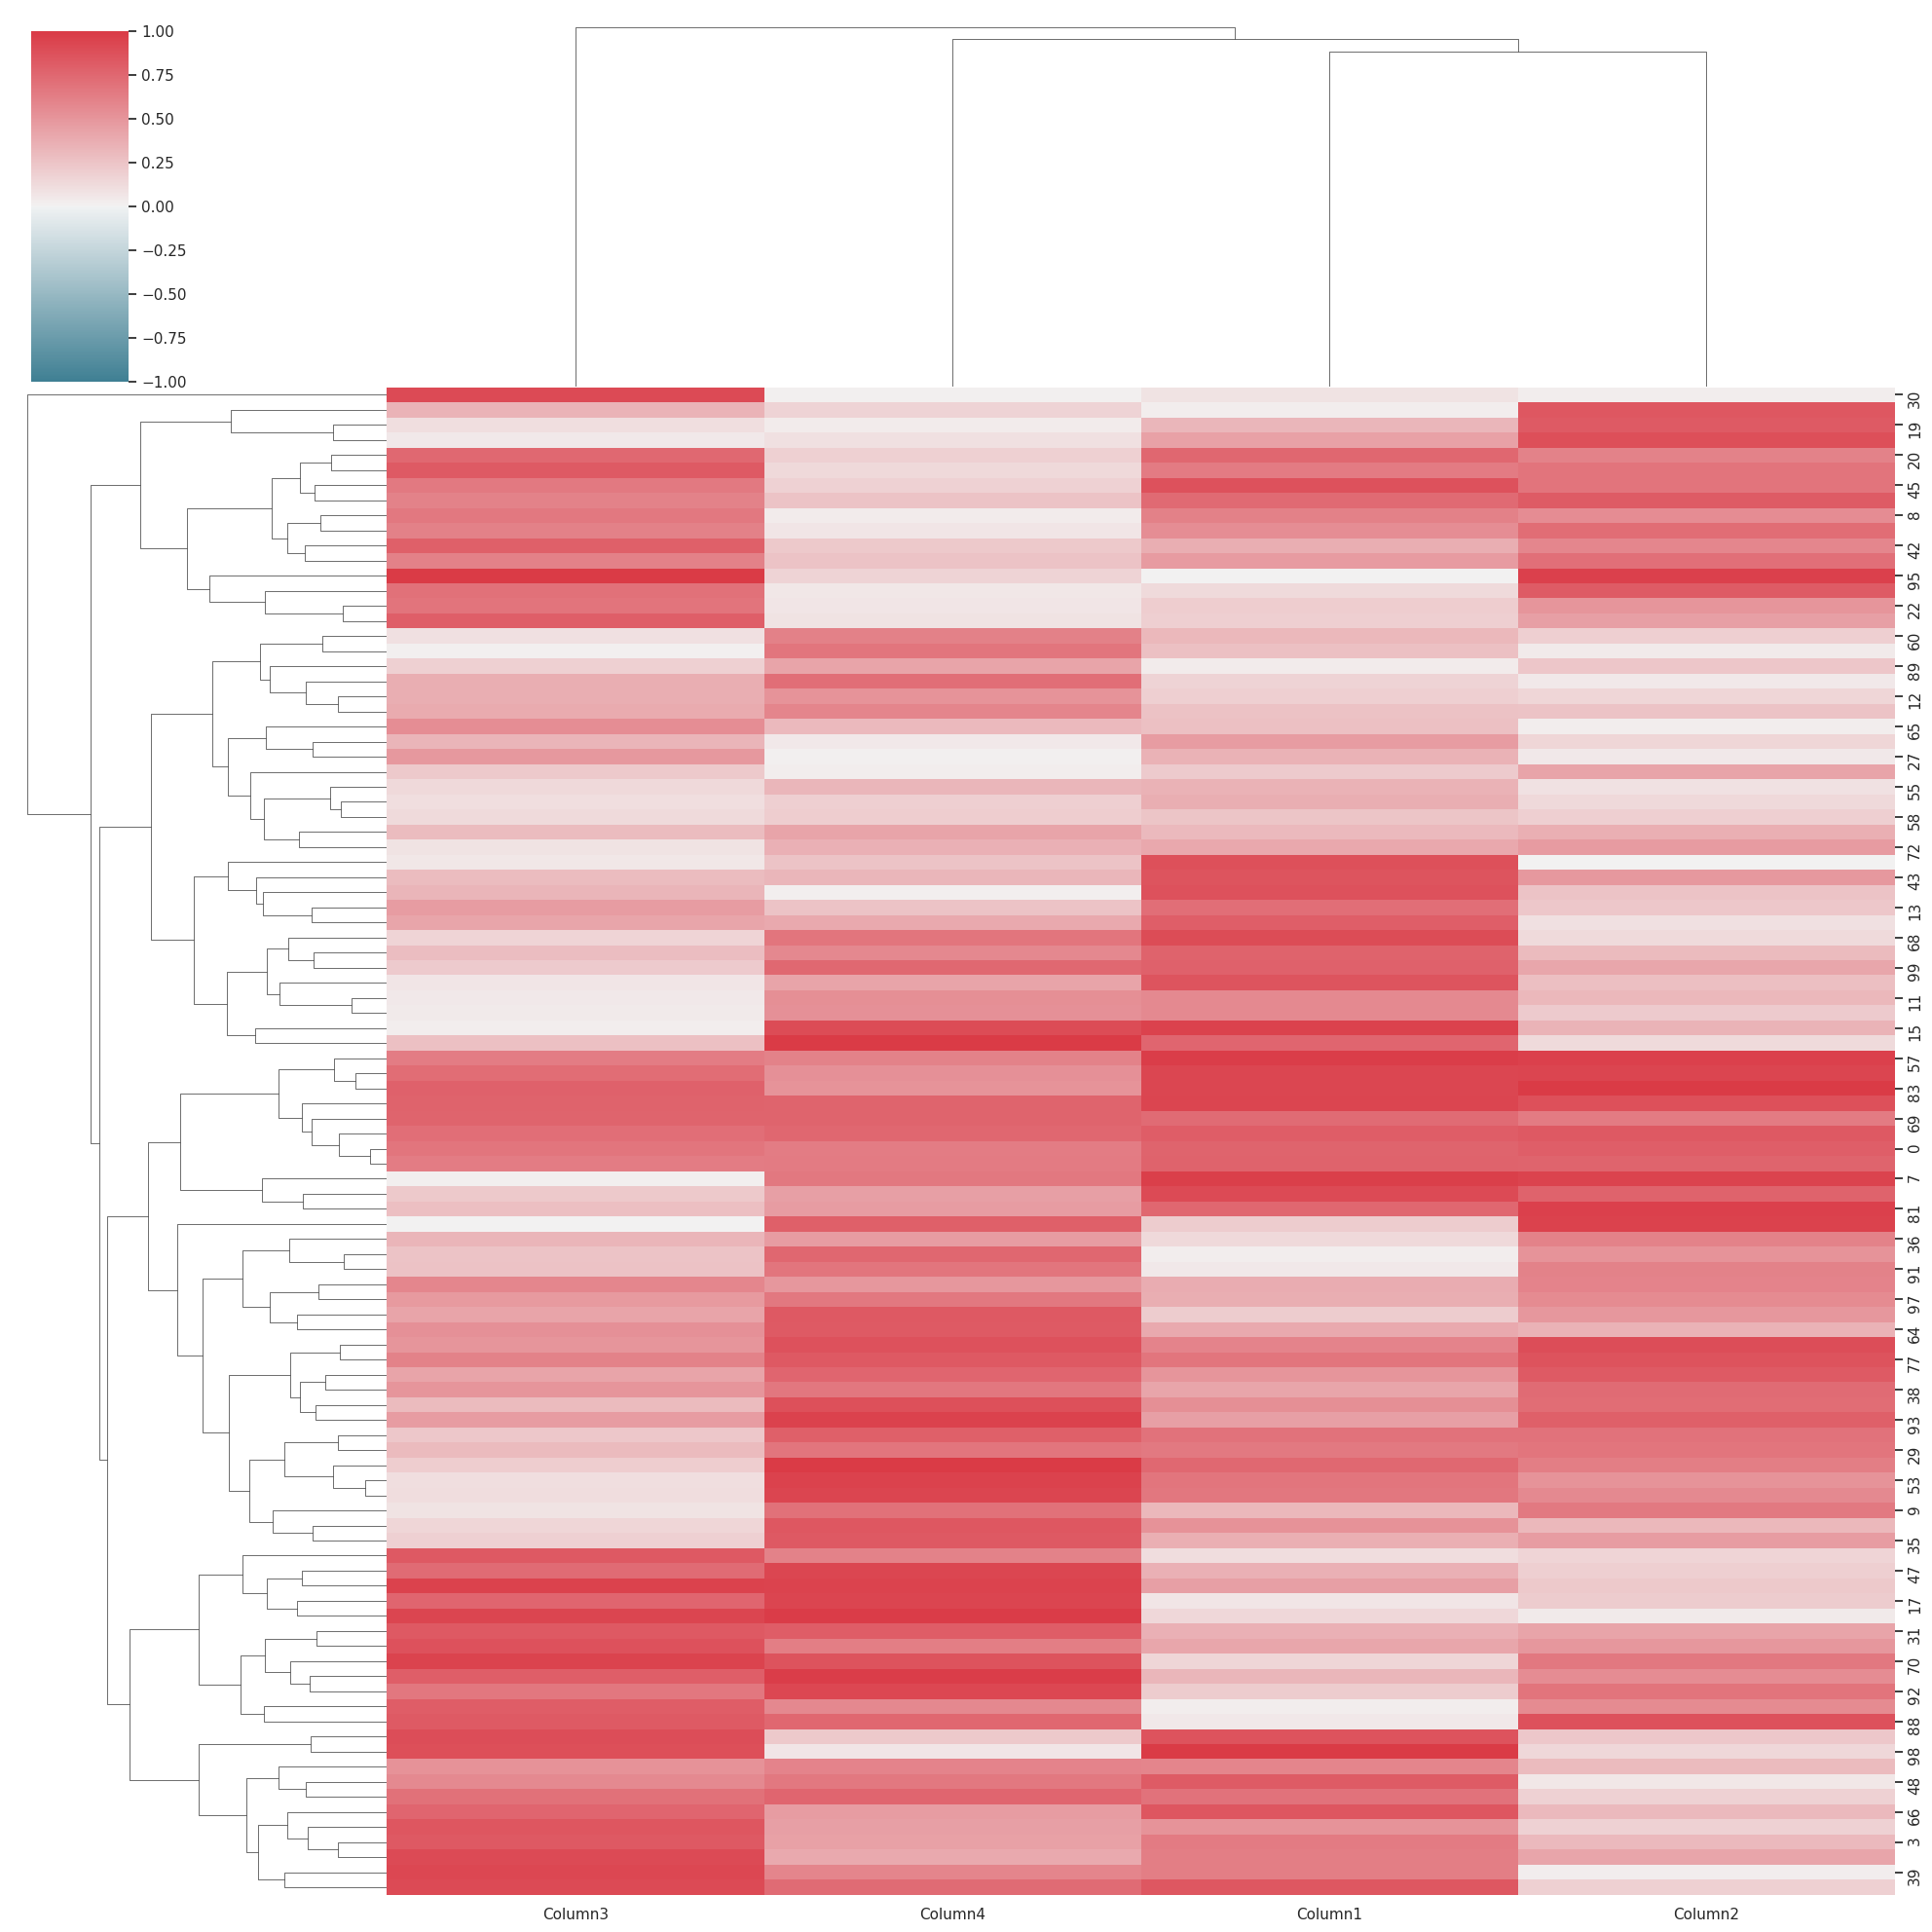

In [17]:
cplocorr.plot_heatmap(test_df, mode, figsize=config["figsize"])

## `plot_performance()`

In [18]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.557GB vms=6.883GB mem_pct=1%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.601GB vms=6.890GB mem_pct=1%


/app/core/statistics/requires_statsmodels.py:183: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  ) = sm.tsa.stattools.kpss(data.values, regression=regression, nlags=nlags)


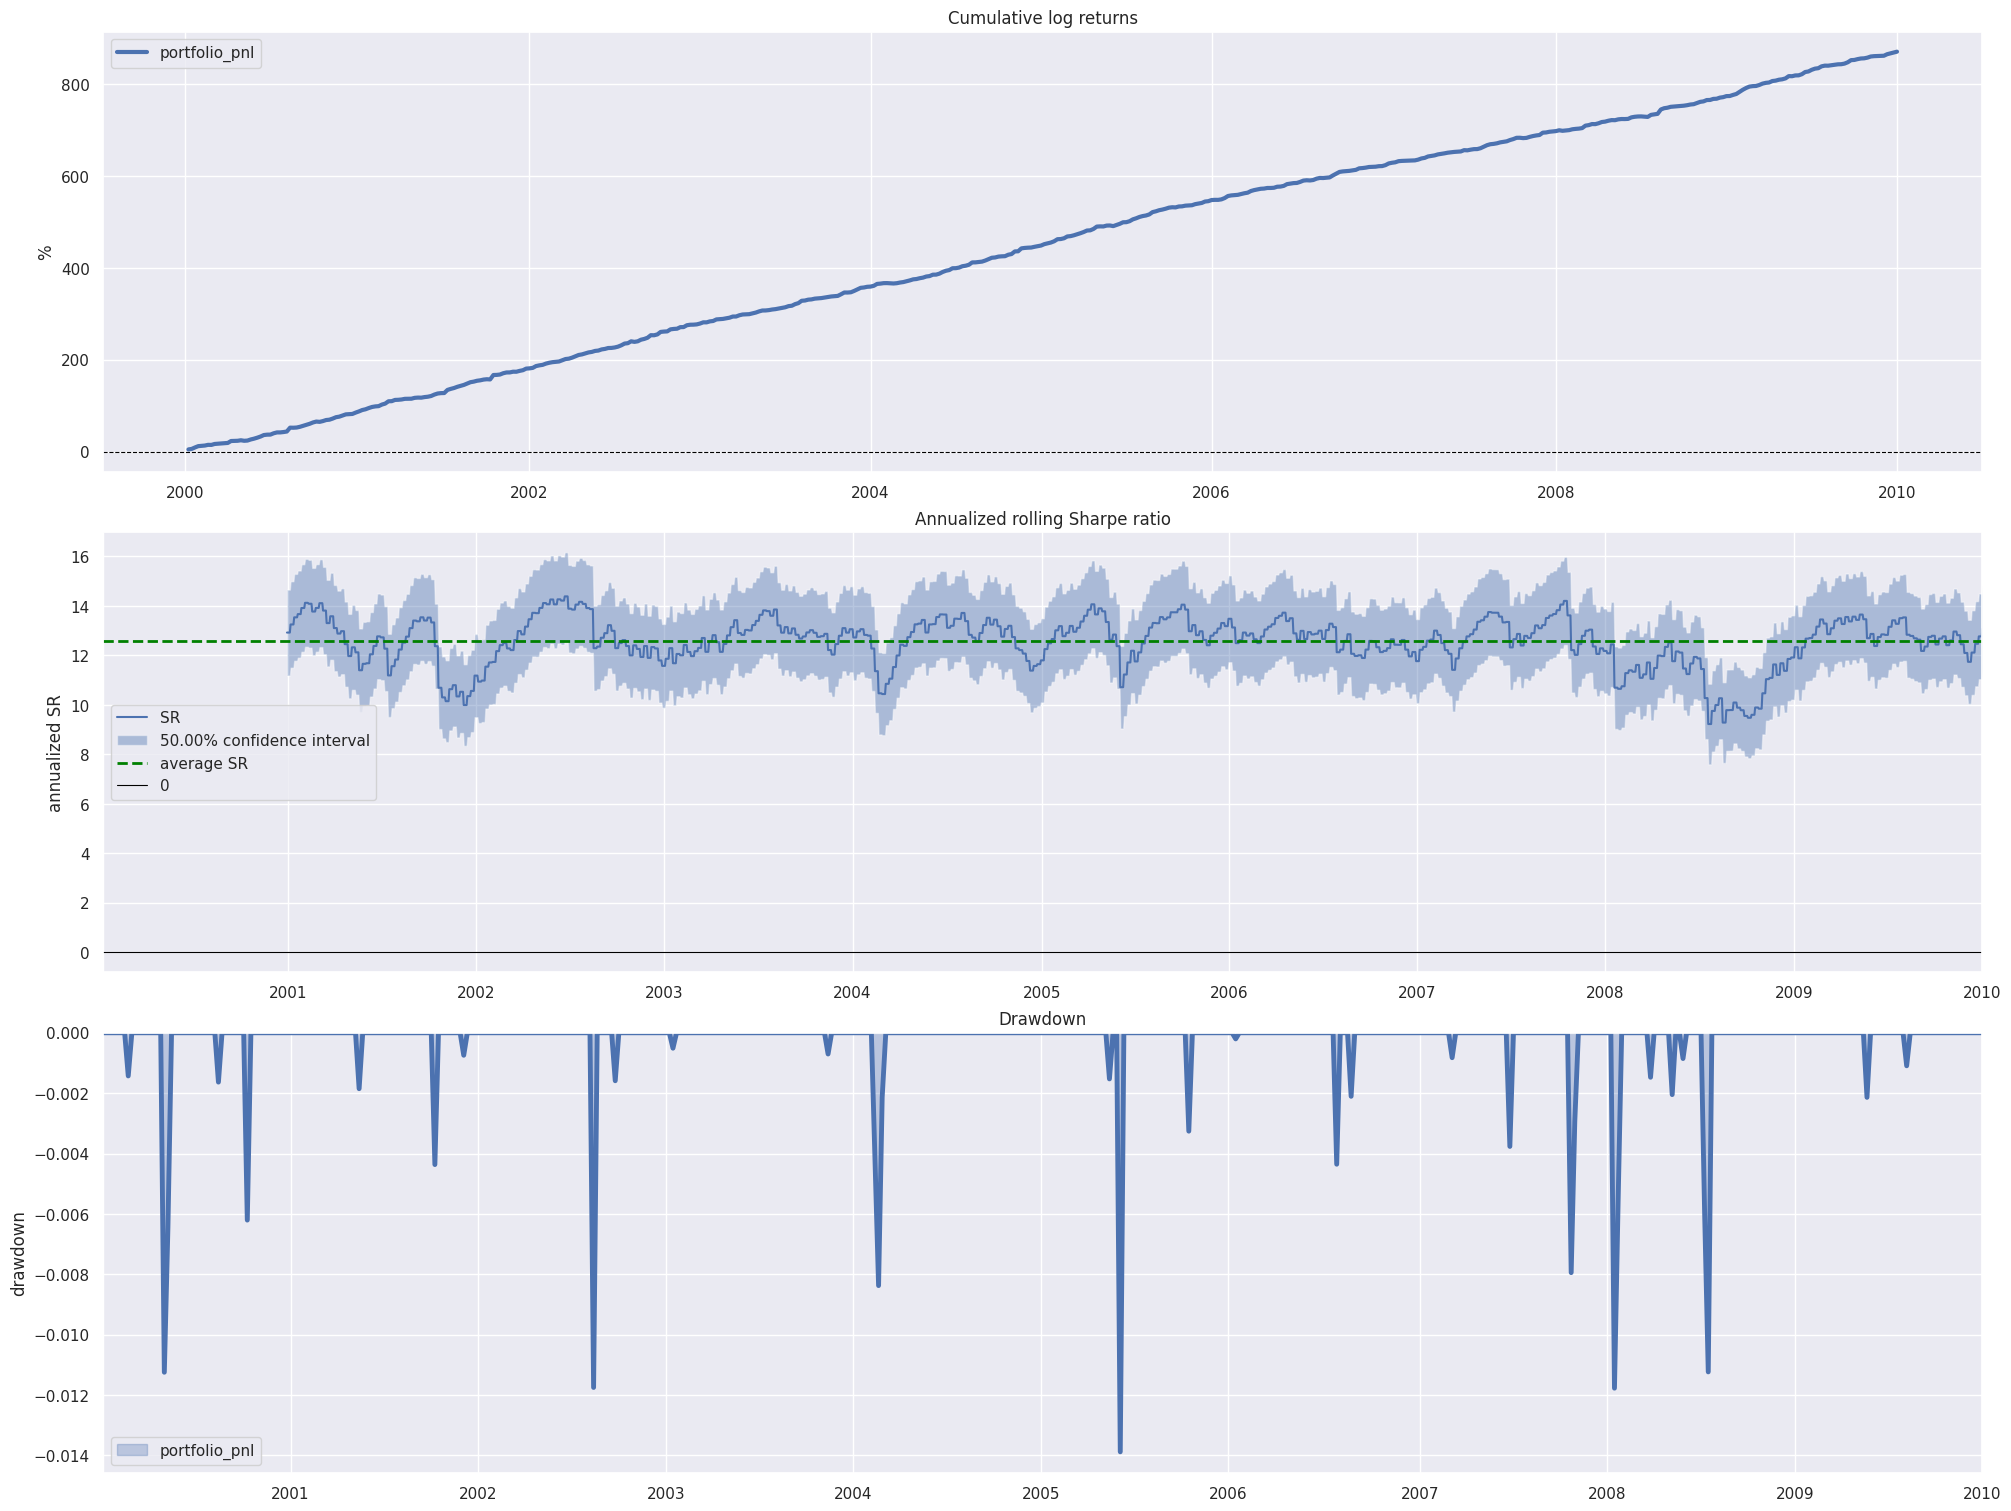

In [19]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_rets_signal_analysis()`

In [20]:
evaluator, eval_config = cdmttme.get_example_model_evaluator()
plotter = dtfmomoplo.ModelPlotter(evaluator)
keys = None

Calculating positions:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/8 [00:00<?, ?it/s]

INFO  memory_usage=rss=0.598GB vms=6.887GB mem_pct=1%
INFO  stats=
avg_turnover_(%)           140.416746
turnover_frequency      <BusinessDay>
avg_holding_period           0.712166
holding_period_units    <BusinessDay>
Name: positions, dtype: object
INFO  memory_usage=rss=0.598GB vms=6.887GB mem_pct=1%


/app/core/statistics/requires_statsmodels.py:183: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  ) = sm.tsa.stattools.kpss(data.values, regression=regression, nlags=nlags)


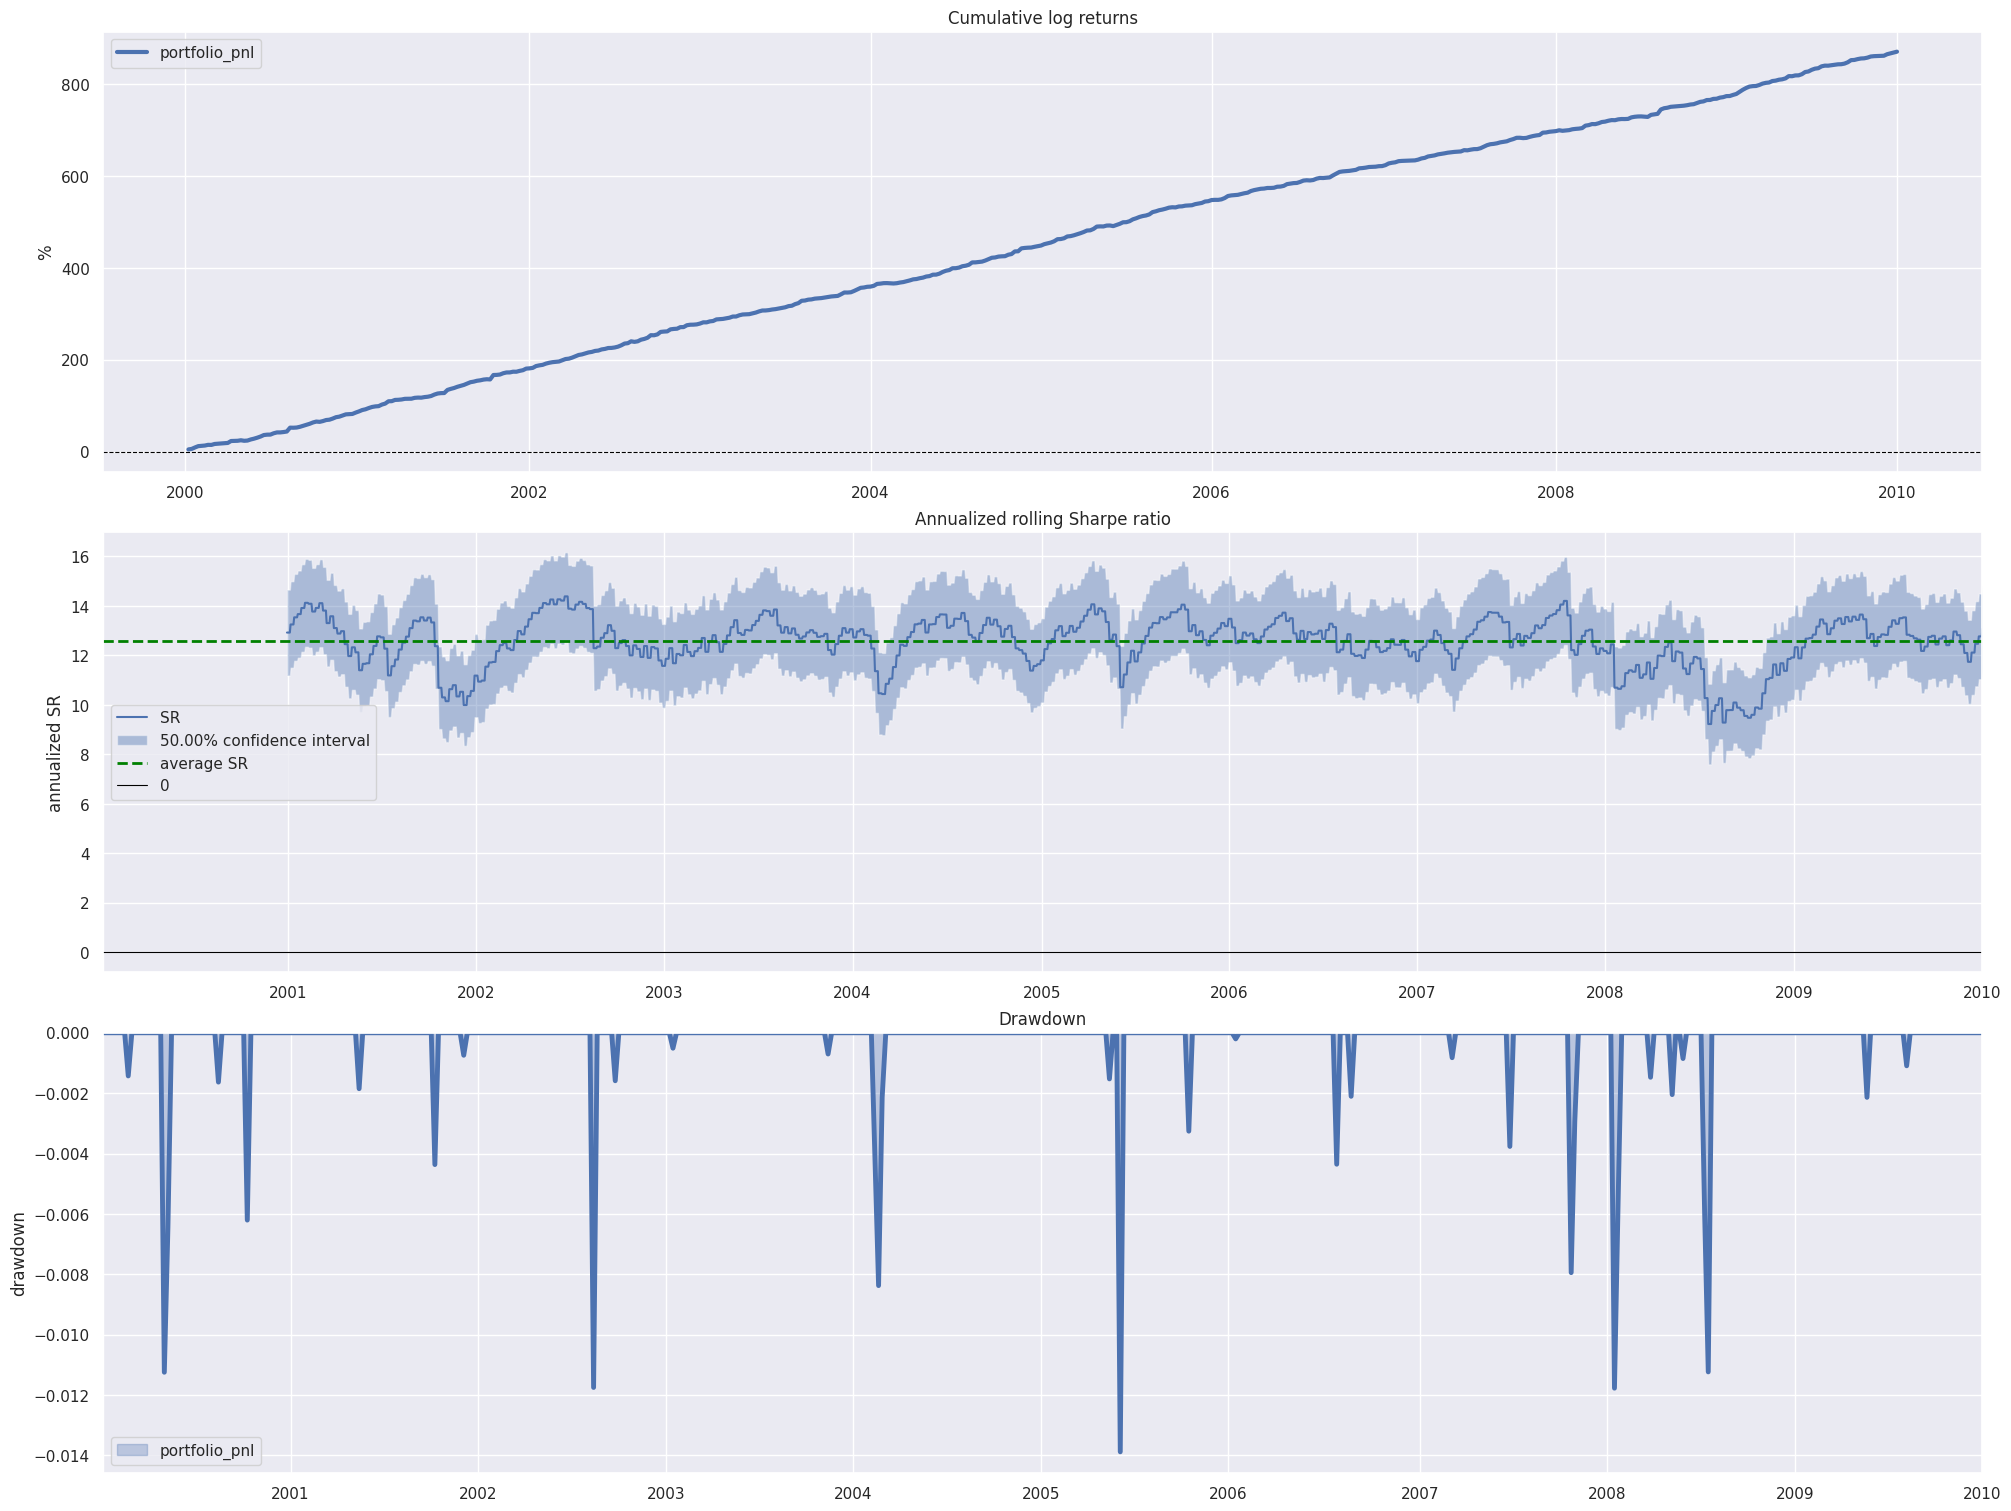

In [21]:
plotter.plot_performance(
    keys=keys,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

## `plot_effective_correlation_rank()`

[3.9789772285834033, 3.958659710061248, 3.530344602316189]

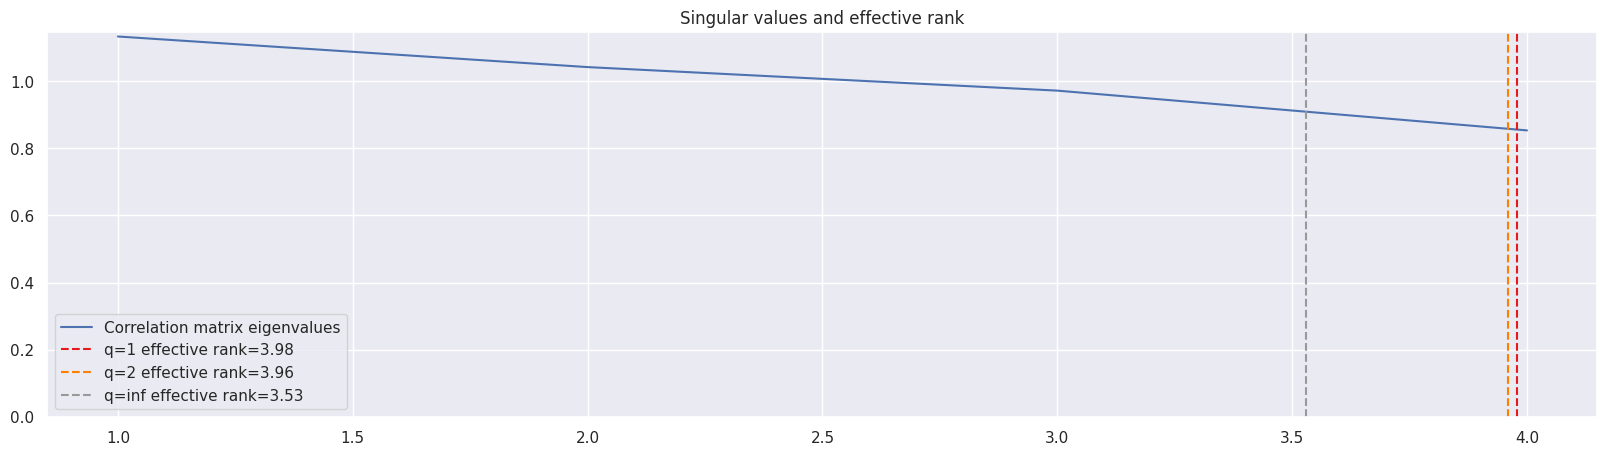

In [22]:
cplocorr.plot_effective_correlation_rank(test_df)

[3.9017788715750337,
 3.8461432645199674,
 3.9272742538722114,
 3.8474696413918235,
 3.9556212306495704]

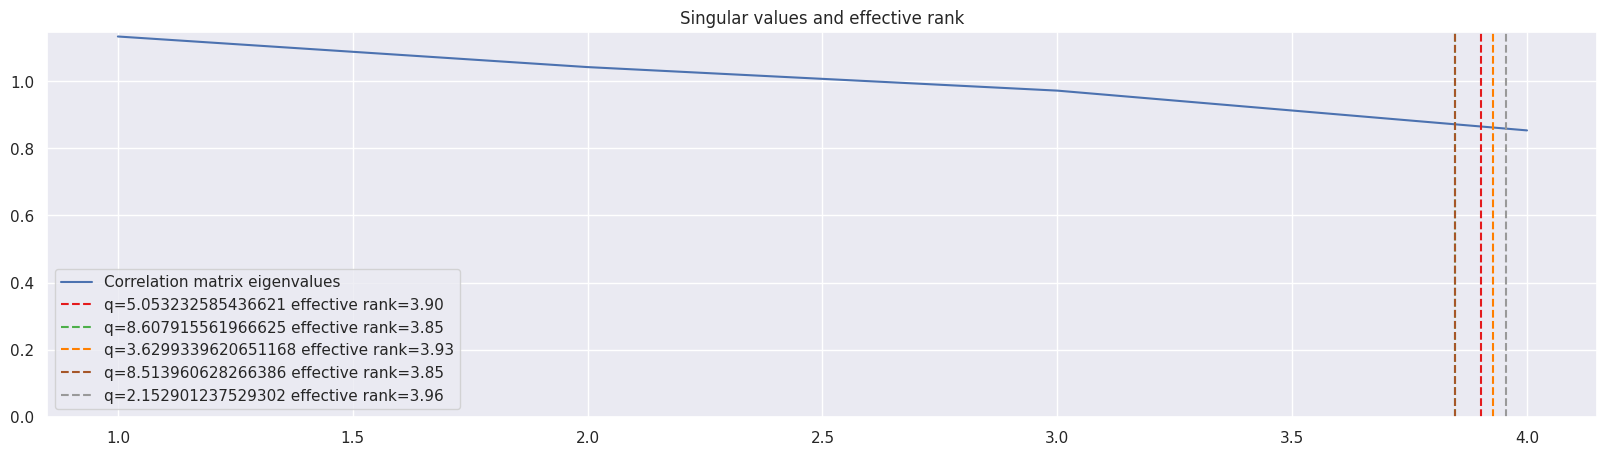

In [23]:
num_q_values = 5
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

/venv/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '


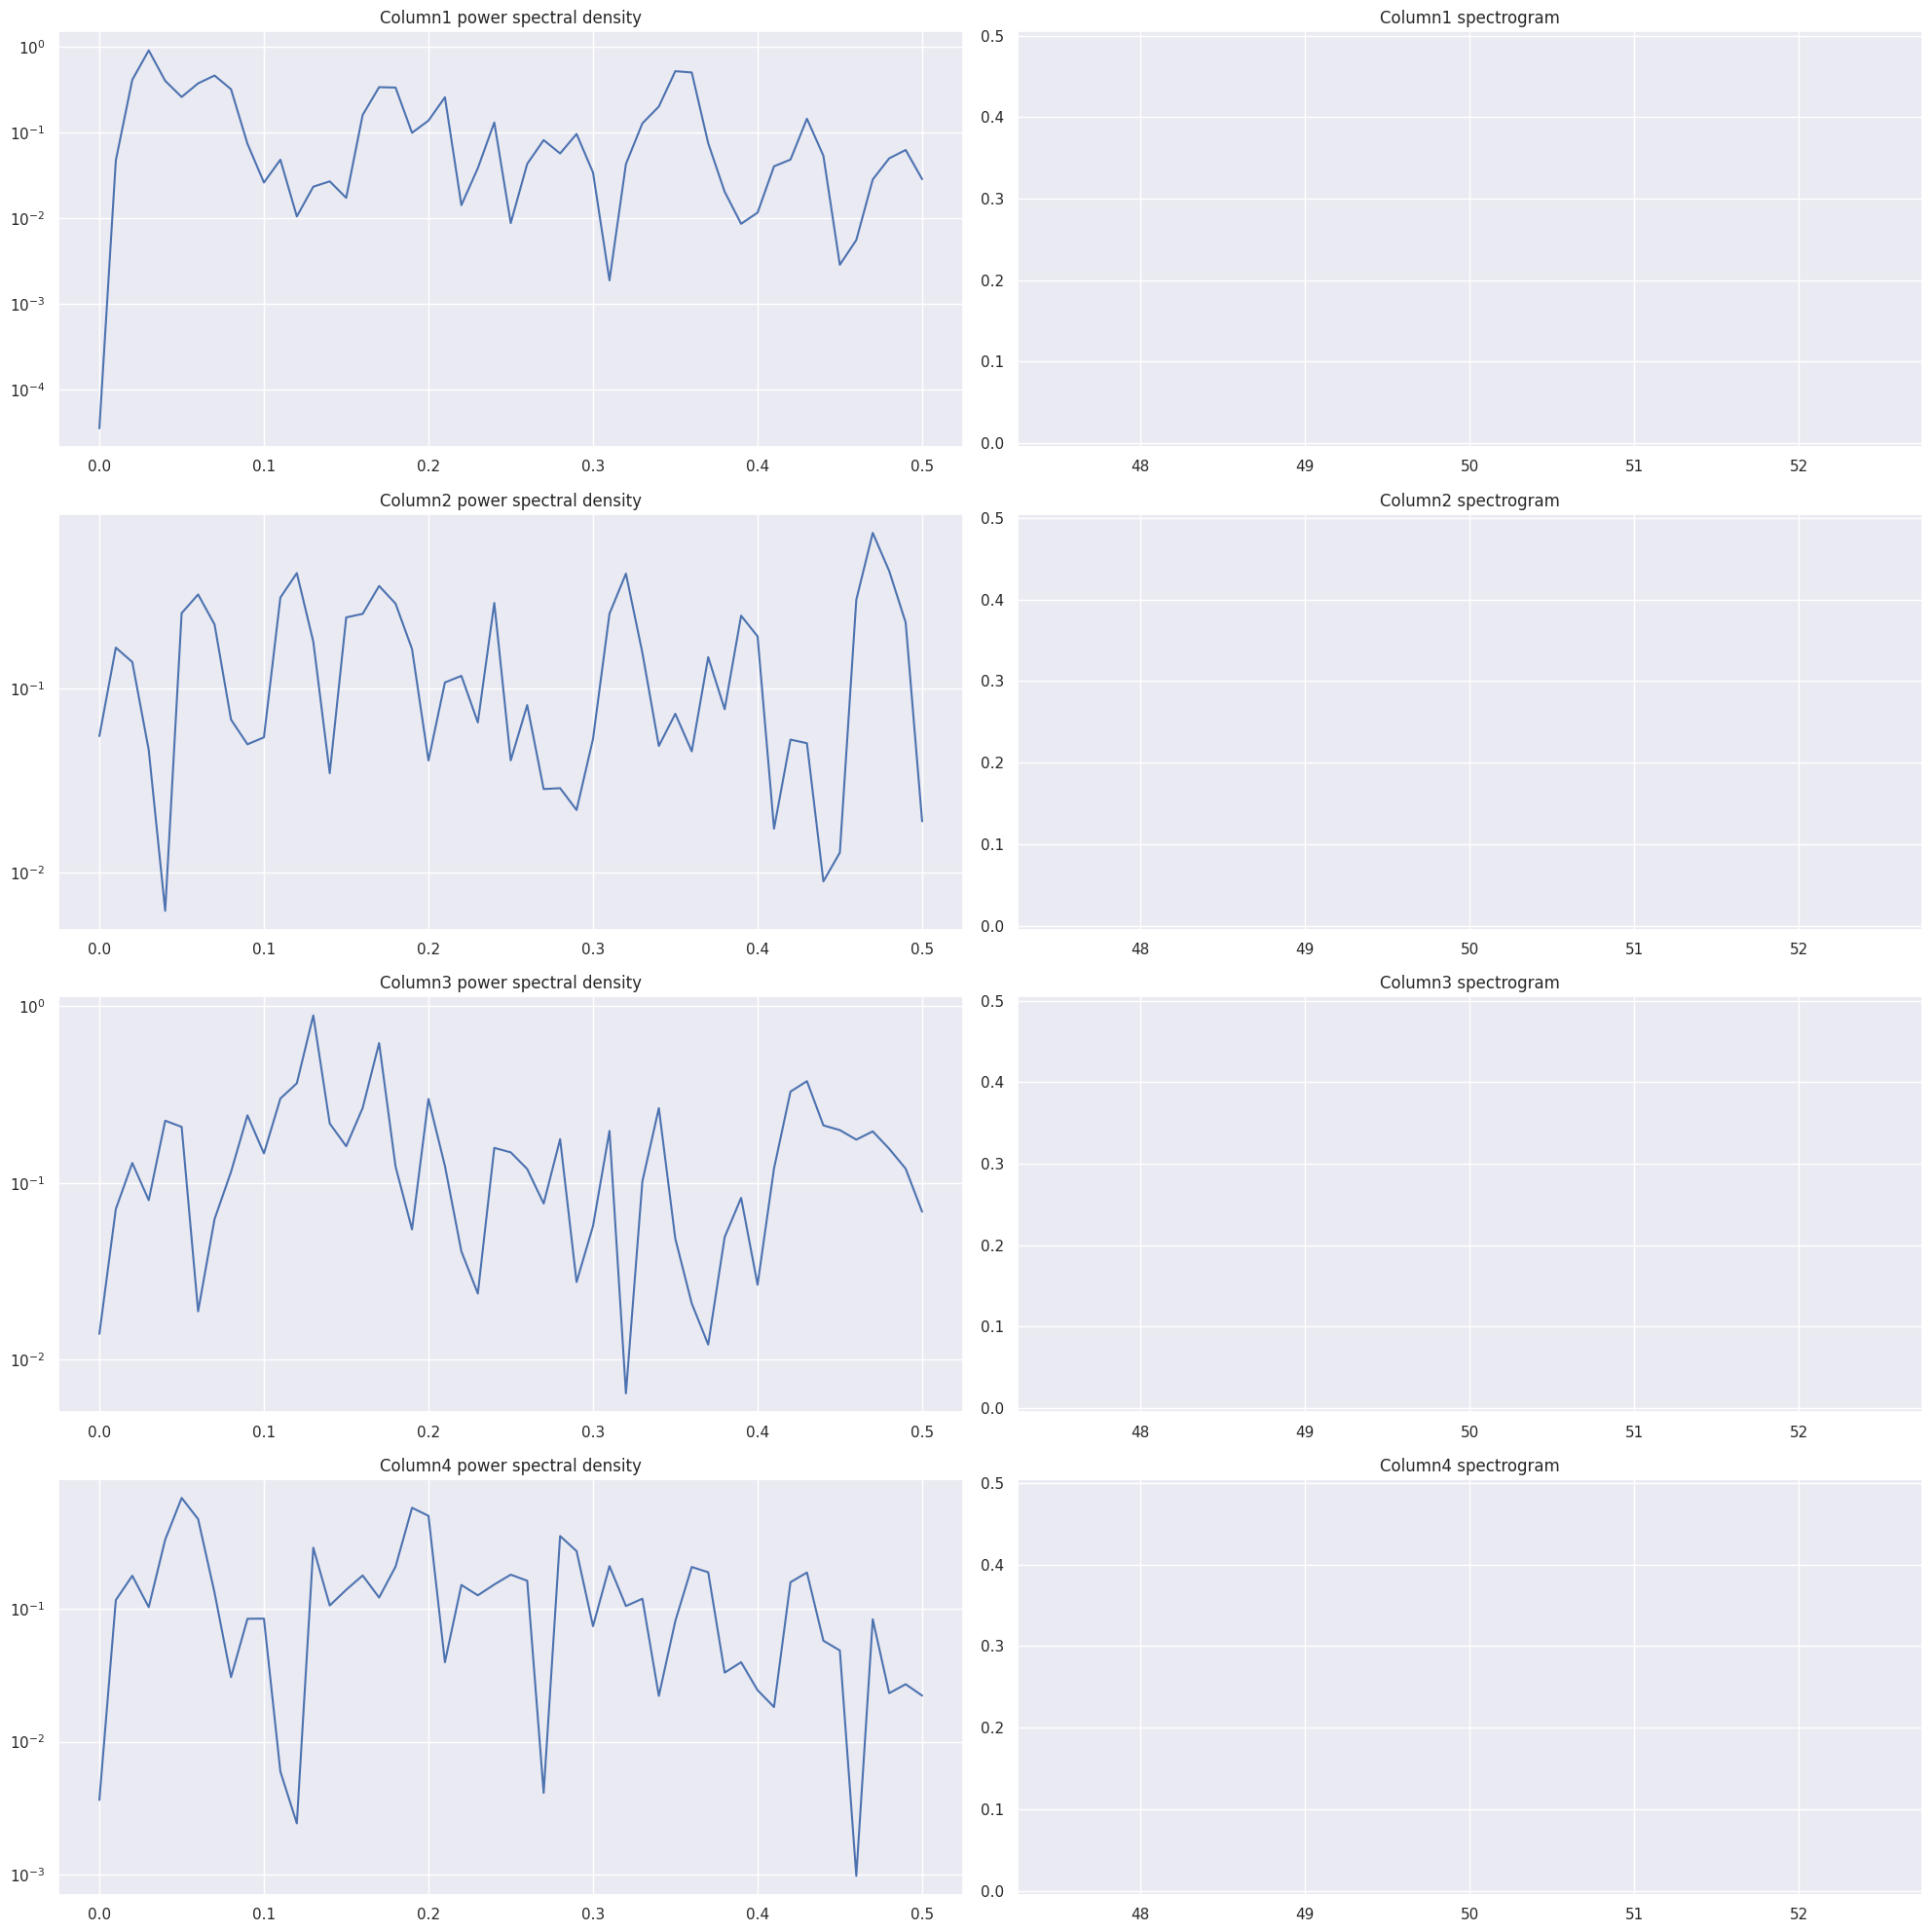

In [24]:
cplmiplo.plot_spectrum(test_df)

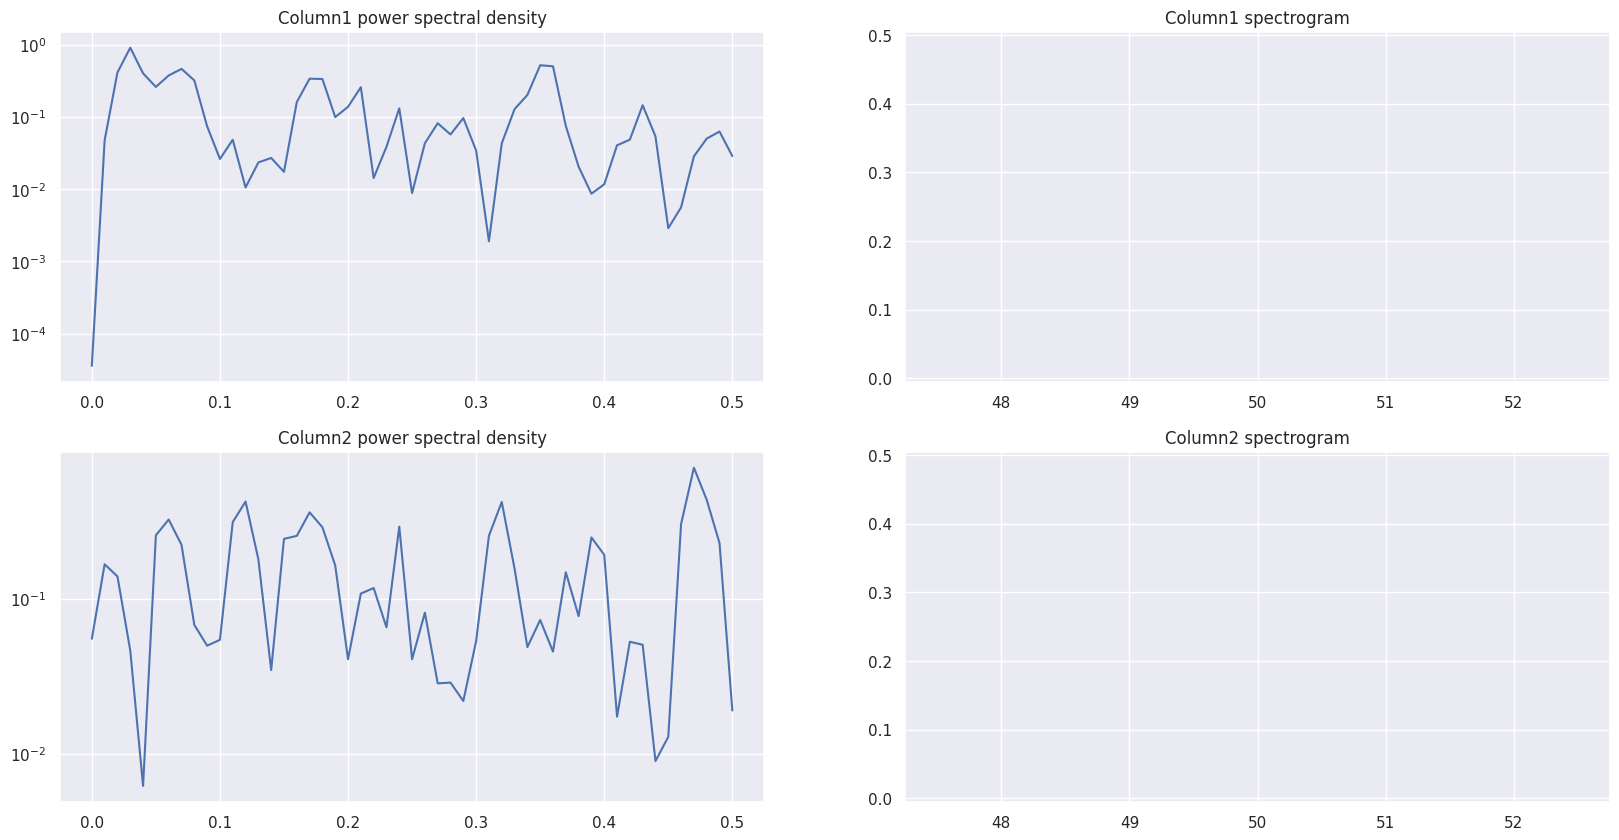

In [25]:
_, axes = plt.subplots(2, 2, figsize=config["figsize"])
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)

## `plot_boxplot()`

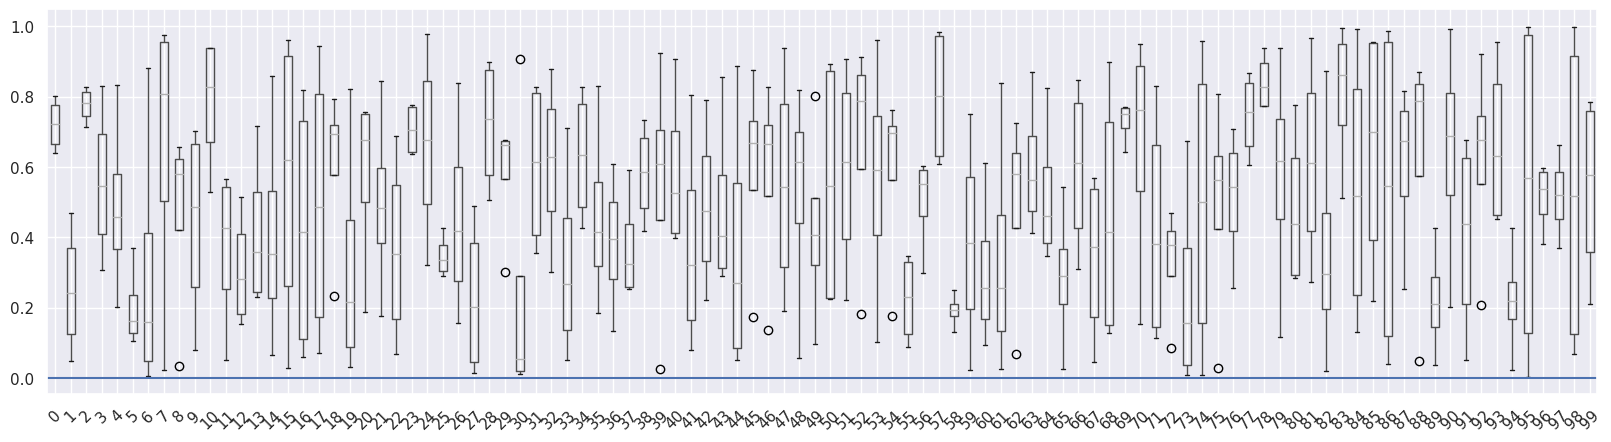

In [26]:
cploboxp.plot_boxplot(test_df)

In [29]:
grouping = "by_col"
ylabel = "Test Label"

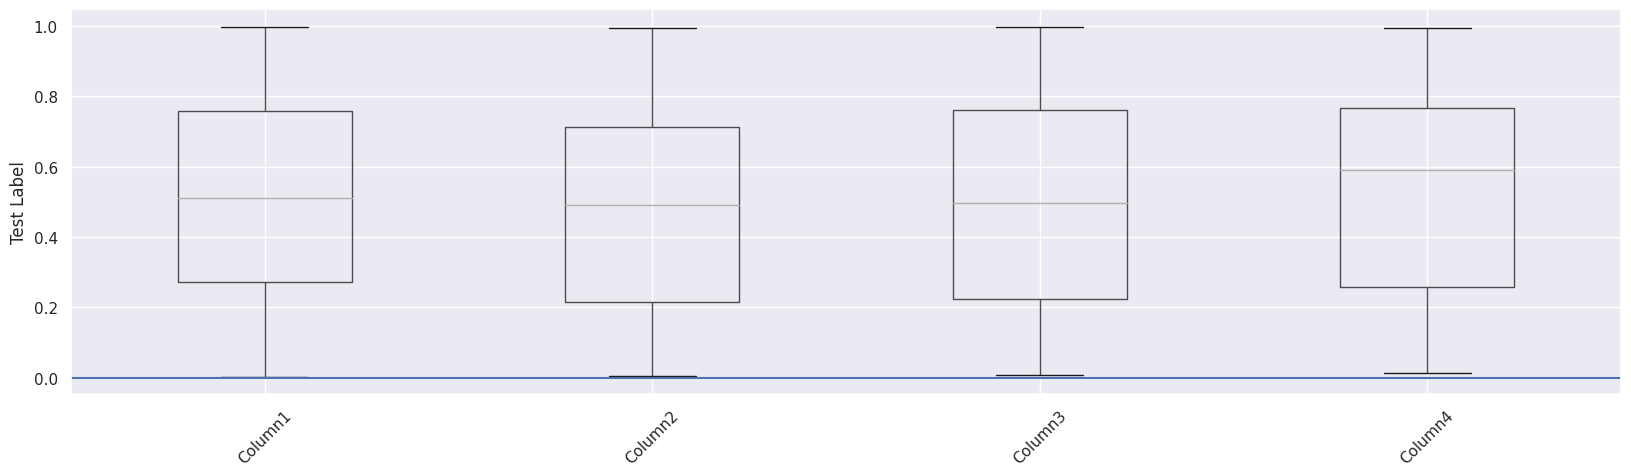

In [30]:
cploboxp.plot_boxplot(test_df, grouping=grouping, ylabel=ylabel)